# Gibbs Sampling for HMM

## (a)

\begin{align}
P(Y_t = y | Y_{-t} = y_{-t}, X = x) & = \frac{P(Y_t = y, Y_{-t} = y_{-t}, X = x)}{P(Y_{-t} = y_{-t}, X = x)}\\
& = \frac{P(Y_1 = y_1) \Pi_{i = 2}^T P(Y_i = y_i | Y_{i-1} = y_{i-1}) \Pi_{i = 1}^T P(X_i = x_i | Y_i = y_i)}
{\int P(Y_{-t} = y_{-t}, X = x, Y_t = y) dy}\\
& = \frac{const \times P(Y_t = y | Y_{t-1} = y_{t-1}) P(Y_{t+1} = y_{t+1} | Y_{t} = y) P(X_t = x_t | Y_t = y)}{const}\\
& \propto P(Y_t = y | Y_{t-1} = y_{t-1}) P(Y_{t+1} = y_{t+1} | Y_{t} = y) P(X_t = x_t | Y_t = y)
\end{align}

Note I just leave out terms not relevant to $y$ as constant. 

## (b)
For $t = 1$, from the same formula above, we get 
$$P(Y_1 = y | Y_{-1} = y_{-1}, X = x) \propto P(Y_{2} = y_{2} | Y_{1} = y) P(Y_{1} = y | Y_{0} = <s>) P(X_1 = x_1 | Y_1 = y)$$

For $t = T$, from the same formula above, we get 
$$P(Y_T = y | Y_{-T} = y_{-T}, X = x) \propto P(</s> | Y_{T} = y) P(Y_{T} = y | Y_{T-1} = y_{T-1}) P(X_T = x_T | Y_T = y)$$

## (c) 
code is implemented in `../code/gibbs.py`

In [1]:
import sys
sys.path.insert(0, "../code")
import numpy as np
import itertools
import time
import sys
from gibbs import gibbs, gibbs_predictor
from data_pre import data_preprocessing
from misc import compute_prob_log,compute_tag_acc
import matplotlib.pyplot as plt



In [2]:
(data_train,data_dev,word2ix, ix2word, tag2ix, ix2tag, em_prob, trans_prob) = data_preprocessing()
em_prob[em_prob == 0] = sys.float_info.min
trans_prob[trans_prob == 0] = sys.float_info.min

accuracy using gibbs sampling is 0.8607952286282307
log prob of gibbs prediction is -166958.28083890618
runtime for gibbs sampling with K = 5 is 3.0637691020965576


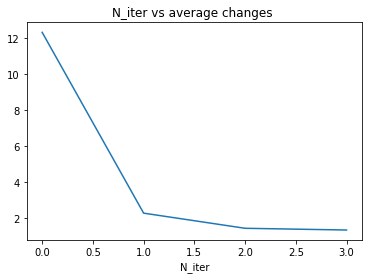

In [3]:
(corpus, tags) = data_dev
K = 5
start = time.time()
(tags_pred, n_changes) = gibbs_predictor(corpus, em_prob, trans_prob, tag2ix, word2ix,ix2tag, K=K)   
runtime = time.time() - start
print("accuracy using gibbs sampling is {}".format(compute_tag_acc(tags_pred, tags)))
print("log prob of gibbs prediction is {}".format(compute_prob_log(corpus, tags_pred, trans_prob, em_prob, word2ix, tag2ix)))
print("runtime for gibbs sampling with K = {} is {}".format(K, runtime))
n_changes = np.array(n_changes)
plt.plot(n_changes.mean(axis = 0))
plt.title("N_iter vs average changes ")
plt.xlabel("N_iter")
plt.show()

### Comment:
With number of iterations growing, the number of changes decrease (but not to zero)

## (d)

In [4]:
# Ks = [2,5,10,50,100,500,1000]
Ks = [2,5,10]
for K in Ks:
    start = time.time()
    (tags_pred, _) = gibbs_predictor(corpus, em_prob, trans_prob, tag2ix, word2ix,ix2tag, K=K)   
    runtime = time.time() - start
    print("Gibbs sampling with K = {}".format(K))
    print("accuracy : {}".format(compute_tag_acc(tags_pred, tags)))
    print("log prob : {}".format(compute_prob_log(corpus, tags_pred, trans_prob, em_prob, word2ix, tag2ix)))
    print("runtime  : {}".format(runtime))

Gibbs sampling with K = 2
accuracy : 0.7738369781312128
log prob : -182824.95629928718
runtime  : 0.796220064163208
Gibbs sampling with K = 5
accuracy : 0.8616302186878728
log prob : -166912.14540487927
runtime  : 3.0685460567474365
Gibbs sampling with K = 10
accuracy : 0.8645328031809145
log prob : -166543.35857864498
runtime  : 6.715641021728516


## (e)

In [7]:
#Ks = [2,5,10,50,100,500,1000]
betas = [0.5,2,5]
Ks = [2,5,10]
for beta in betas:
    print("##--------------------------##")
    print("         beta = {}".format(beta))
    print("##--------------------------##")
    for K in Ks:
        start = time.time()
        (tags_pred, _) = gibbs_predictor(corpus, em_prob, trans_prob, tag2ix, word2ix,ix2tag, K=K, beta = beta)   
        runtime = time.time() - start
        print("Gibbs sampling with K = {}".format(K))
        print("accuracy : {}".format(compute_tag_acc(tags_pred, tags)))
        print("log prob : {}".format(compute_prob_log(corpus, tags_pred, trans_prob, em_prob, word2ix, tag2ix)))
        print("runtime  : {}".format(runtime))

##--------------------------##
         beta = 0.5
##--------------------------##
Gibbs sampling with K = 2
accuracy : 0.6281510934393638
log prob : -224651.09903861157
runtime  : 0.8221950531005859
Gibbs sampling with K = 5
accuracy : 0.7543141153081511
log prob : -191259.52864794512
runtime  : 3.0074219703674316
Gibbs sampling with K = 10
accuracy : 0.7607157057654076
log prob : -190277.78264367563
runtime  : 6.592681884765625
##--------------------------##
         beta = 2
##--------------------------##


../code/gibbs.py:22: RuntimeWarning: invalid value encountered in true_divide
  probs = probs/probs.sum()
../code/gibbs.py:25: RuntimeWarning: invalid value encountered in less
  state[j] = np.random.choice(trans_prob.shape[0], size = 1, p = probs)[0]


Gibbs sampling with K = 2
accuracy : 0.7944333996023857
log prob : -181248.84479157347
runtime  : 0.8314578533172607
Gibbs sampling with K = 5
accuracy : 0.8768190854870775
log prob : -164605.09535703922
runtime  : 3.0259218215942383
Gibbs sampling with K = 10
accuracy : 0.8805566600397614
log prob : -164344.4151261623
runtime  : 6.6583099365234375
##--------------------------##
         beta = 5
##--------------------------##
Gibbs sampling with K = 2
accuracy : 0.800079522862823
log prob : -180427.53231447787
runtime  : 0.826509952545166
Gibbs sampling with K = 5
accuracy : 0.8801590457256461
log prob : -164209.95588998025
runtime  : 3.013672113418579
Gibbs sampling with K = 10
accuracy : 0.8809145129224653
log prob : -164067.4820810276
runtime  : 6.637230157852173


In [ ]:
#Ks = [2,5,10,50,100,500,1000]
annealing = 0.1
betas = [0.5,2,5]
Ks = [2,5,10]
for beta in betas:
    print("##--------------------------##")
    print("         beta = {}".format(beta))
    print("##--------------------------##")
    for K in Ks:
        start = time.time()
        (tags_pred, _) = gibbs_predictor(corpus, em_prob, trans_prob, tag2ix, word2ix,ix2tag, 
                                         K=K, beta = beta, annealing = annealing)   
        runtime = time.time() - start
        print("Gibbs sampling with K = {}".format(K))
        print("accuracy : {}".format(compute_tag_acc(tags_pred, tags)))
        print("log prob : {}".format(compute_prob_log(corpus, tags_pred, trans_prob, em_prob, word2ix, tag2ix)))
        print("runtime  : {}".format(runtime))

# Gibbs Sampling for Minimum Bayes Risk Inference

## (a)

Let $$L(y) = \sum_{y'} P(Y = y' | X = x) $$ where cost is 1-0 cost.
Then we know $$L(y) = \sum_{y' \neq y} P(Y = y' | X = x) = 1 - P(Y = y | X = x)$$
Therefore $$ \hat{y} = \text{argmin}_{y} L(y) = \text{argmax}_{y} P(Y = y | X = x)$$

## (b)
Easy to see that we can approximate with 

$$ P(Y_t | X = x) \approx \frac{1}{K} \sum_{i = 1}^K 1_{[\tilde{y}_t = y]} $$

## outline for code
For each sentence, sampling first (get (K,L) array)

Then, for each position in the sentence, simply find the tag that appears most often (get mode for each column and use it as predict!)

